# Assignment 06

In [1]:
# import the data
# sep x,y
# find out the coef , intercept
# y = m1*x1 + m2*x2 + m3*x3 + c

#KNN Regressor


# calculate r2_score
#compared

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.head()
df.region = le.fit_transform(df.region)
df.sex = le.fit_transform(df.sex) 
df.smoker = le.fit_transform(df.smoker) 
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<AxesSubplot:title={'center':'Data Description'}>

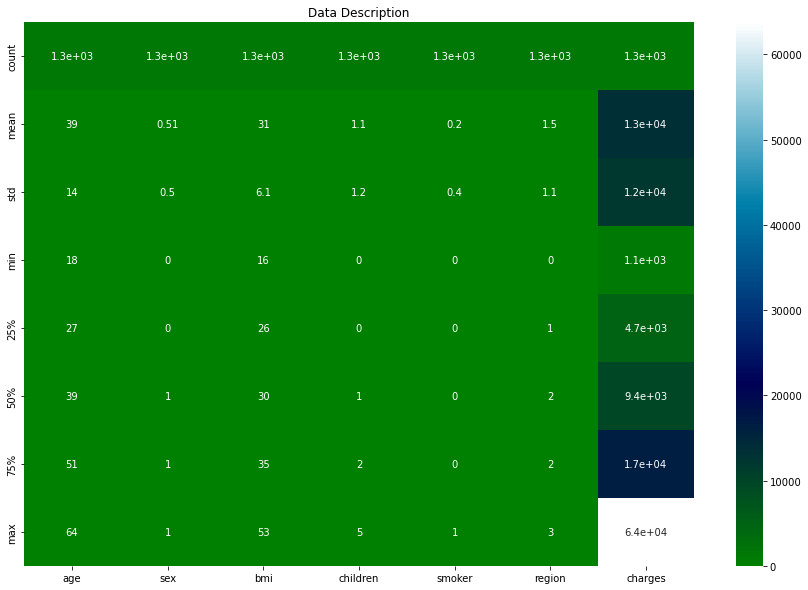

In [9]:
#data_visulation  #Data_Description
plt.figure(figsize= (15,10))             
plt.title('Data Description')
sns.heatmap(df.describe(),cmap='ocean', annot= True)


<AxesSubplot:title={'center':'Correlation for Every Column'}>

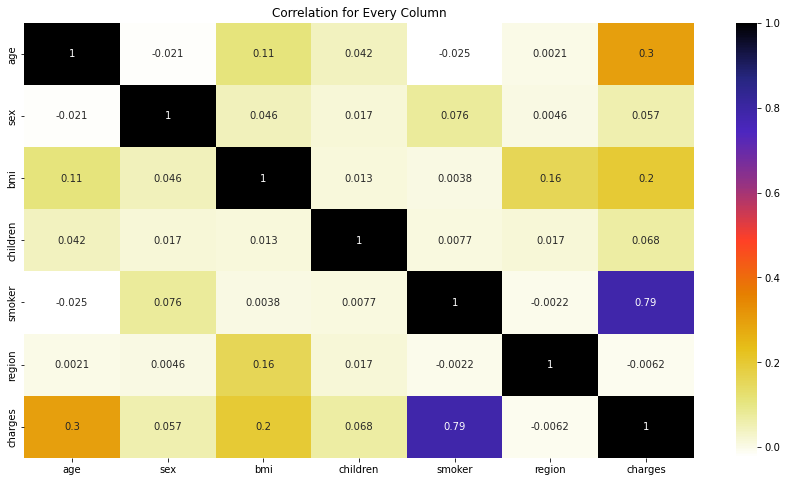

In [10]:
#data_visulation  #Data_correlation
plt.figure(figsize= (15,8))             
plt.title('Correlation for Every Column')
sns.heatmap(df.corr(),cmap='CMRmap_r',annot= True)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [12]:
#x, y seperate
x = df.drop(['charges'], axis = 1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [13]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Multiple Linear Regression

In [14]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=.30)

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(xtrain, ytrain)

In [16]:
m = reg.coef_
c = reg.intercept_
print(m,c)

[  252.78131686  -173.27736763   341.14875679   428.54731089
 23515.43827642  -509.57286646] -11593.167552013678


In [17]:
ypred = reg.predict(xtest)
ypred

array([13147.43840515,  6460.92243467, 29323.86334501,  5334.82695208,
       12415.0135173 , 13437.70515314, 27123.70711339, 29574.25673411,
       38091.07998245,  5940.39433319, 38106.6071137 ,   -77.44851485,
        2437.71752838,  8503.27367105, 14329.80561721,  7329.13739322,
        8450.69490508, 14377.89768   ,  2506.35835252, 30916.90058223,
        3572.25871812,  7321.6110123 , 38452.18226856, 11556.11756748,
       32266.95858097, 29553.60013632, 11827.58768169, 13155.58279268,
       10668.88449148, 14652.47286962,  7276.40790318,  7004.50745473,
        -305.71722141,  4296.19183535,  7409.0680908 ,  1875.84960146,
       11879.42246888,  5981.30738115,  5050.08456321, 35383.72270469,
       14886.20070014,  6437.28108068,  8306.43808971,  5555.75706165,
        5282.81674467,  7831.37698101, 13115.9147882 ,  9250.79306306,
        8178.63661173,  4229.42005157, 11227.05778572,  5741.40134532,
       36751.99672776,  9013.27328586, 12369.6243322 ,  5607.13304345,
      

In [18]:
df_predct = pd.DataFrame({'actuals':ytest, 'prediction':ypred, 'resid': ytest - ypred})

In [19]:
df_predct

,actuals,prediction,resid
221,10564.88450,13147.438405,-2582.553905
785,6414.17800,6460.922435,-46.744435
1011,18767.73770,29323.863345,-10556.125645
749,3062.50825,5334.826952,-2272.318702
403,10269.46000,12415.013517,-2145.553517
...,...,...,...
1145,11289.10925,13335.403127,-2046.293877
857,15817.98570,25790.872913,-9972.887213
410,1621.34020,-1509.892497,3131.232697
698,10976.24575,13384.977781,-2408.732031


# model performance


In [20]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
mse= mean_squared_error(ytest,ypred) 
r2_MLR = r2_score(ytest, ypred) 
mae= mean_absolute_error(ytest, ypred)

In [21]:
r2_MLR

0.7481440796408582

In [22]:
mse

39505857.71277628

In [23]:
mae

4438.174695138714

# KNN Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(xtrain, ytrain)


KNeighborsRegressor()

In [25]:
K_predct = neigh.predict(xtest)
K_predct


array([17149.98228  ,  5751.57091  , 12632.36848  , 16015.57002  ,
       13297.835778 , 13460.394682 , 15453.287816 , 15817.24558  ,
       16551.5838   , 10391.84394  , 27798.65241  ,  5144.66135  ,
        7655.49302  ,  8878.76002  , 19610.25652  ,  9843.08404  ,
       10458.09483  , 12424.16692  , 11065.6519518, 12165.35803  ,
       15212.51109  ,  9197.74547  , 22502.302996 , 11385.1367   ,
       14729.610006 ,  9656.73882  , 12014.63949  , 15537.90151  ,
       16471.985336 , 27282.76579  , 16134.637092 ,  6501.206    ,
        8053.341226 ,  3679.931736 , 16603.24425  ,  7362.37716  ,
       12447.4272   ,  2846.42081  ,  4137.942956 , 10080.4518   ,
       20101.11729  , 16586.15272  ,  8830.91045  , 11091.122888 ,
        7666.95392  , 15220.2823   , 19785.644604 , 21414.331624 ,
       10501.67606  , 11673.25538  , 17133.140036 ,  2276.03038  ,
       23060.38527  , 15344.46995  ,  9488.3942   , 13829.47013  ,
        7871.400878 , 14185.12936  ,  8371.74474  ,  9505.4505

In [26]:
mse1= mean_squared_error(ytest,K_predct)
r2knn_1 = r2_score(ytest, K_predct)
mae1= mean_absolute_error(ytest, K_predct)


In [27]:
r2knn_1

0.13901711989052334

In [28]:
mse1

135052879.06767553

In [29]:
mae1

8281.736305118407

# evoluation of knn accuracy

In [30]:
scores = []
neighbors = range(1,51)

for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(xtrain, ytrain)
    ypred_1 = knn.predict(xtest)
    scores.append(metrics.r2_score(ytest,ypred_1))


Text(0, 0.5, 'Testing Accoracy')

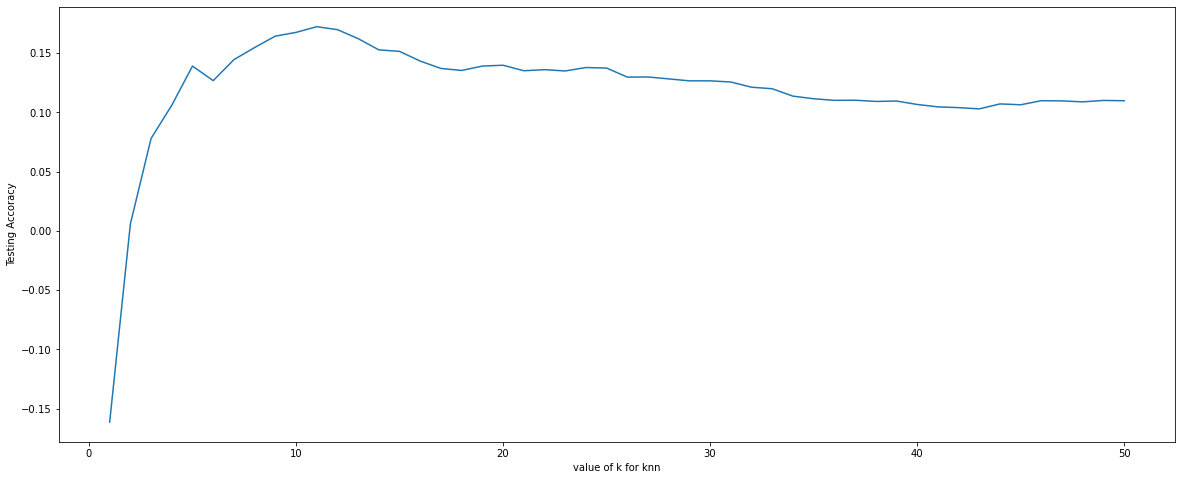

In [31]:
plt.figure(figsize= (20,8)) 
plt.plot(neighbors, scores)
plt.xlabel('value of k for knn')
plt.ylabel('Testing Accoracy')


In [32]:
neigh1 = KNeighborsRegressor(n_neighbors=12)
neigh1.fit(xtrain, ytrain)


KNeighborsRegressor(n_neighbors=12)

In [33]:
K_predct1 = neigh1.predict(xtest)
K_predct1


array([15774.529935  ,  7929.92870417, 10794.2066125 , 11213.70740833,
       11173.4083075 , 12110.7990925 , 11805.84224417,  8748.68187917,
       20233.0998    , 10387.80942083, 22487.84206667,  4047.3680625 ,
        8760.71759917, 12000.6544875 , 18866.91812167,  9191.4548875 ,
       10052.88393333, 21308.88350833, 10018.95767575,  9446.36685417,
       12007.2869625 ,  7714.64901667, 27638.581155  , 13416.11377667,
       17844.15006083, 13230.531075  , 11923.8277875 , 15143.71481667,
       12681.32361917, 27980.21194583, 17327.43250083,  9434.42839167,
        6274.28238417,  5051.011365  , 12160.89979583,  9203.9646275 ,
       16335.33869167,  7037.2896575 ,  4508.768735  , 12265.28310833,
       16679.323575  ,  9905.15169167, 11381.57902083,  8876.603715  ,
        9784.99388333, 14665.0191    , 17880.13298083, 15576.7871175 ,
       12115.66364583, 11390.34181333, 18125.62008917,  5211.23624583,
       17477.5416    , 14269.03396667, 14147.63295583,  9897.46463333,
      

In [34]:
r2knn_2 = r2_score(ytest, K_predct1)

In [36]:
r2knn_2

0.1697273354524813

In [37]:
r2scores_df = pd.DataFrame([ ['MLR',  r2_MLR], ['KNN', r2knn_2]], columns=['Algorithm Name', 'r2_scores'])

In [38]:
r2scores_df

,Algorithm Name,r2_scores
0,MLR,0.748144
1,KNN,0.169727


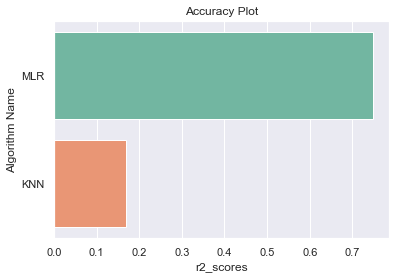

In [39]:
sns.set()
sns.barplot(y="Algorithm Name", x="r2_scores",  data=r2scores_df,  palette="Set2").set(title='Accuracy Plot')   
sns.set(rc={'figure.figsize':(3,20)})  
